# Hierarchical clustering 範例
範例目標：讓同學了解如何使用 sklearn 執行 hierarchical clustering <br />
範例重點：設定 模型估計參數 以及 資料建模 兩大區塊<br />
(Optional) 若尚未安裝相關套件，執行下一行，然後 restart kernel

In [1]:
!pip3 install --user sklearn
!pip3 install --user --upgrade matplotlib

You are using pip version 9.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Requirement already up-to-date: matplotlib in /Users/xiejialun/Library/Python/3.6/lib/python/site-packages
Requirement already up-to-date: numpy>=1.11 in /Users/xiejialun/Library/Python/3.6/lib/python/site-packages (from matplotlib)
Requirement already up-to-date: python-dateutil>=2.1 in /Users/xiejialun/Library/Python/3.6/lib/python/site-packages (from matplotlib)
Requirement already up-to-date: kiwisolver>=1.0.1 in /Users/xiejialun/Library/Python/3.6/lib/python/site-packages (from matplotlib)
Requirement already up-to-date: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>=2.0.1 in /Users/xiejialun/Library/Python/3.6/lib/python/site-packages (from matplotlib)
Requirement already up-to-date: cycler>=0.10 in /Users/xiejialun/Library/Python/3.6/lib/python/site-packages (from matplotlib)
Requirement already up-to-date: six>=1.5 in /Users/xiejialun/Library/Pyth

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets

np.random.seed(5)

In [4]:
toy = datasets.make_blobs(centers = 3, n_features = 4)
x = toy[0]
y = toy[1]

In [7]:
estimators = [ ('hc_ward' , AgglomerativeClustering(n_clusters = 3, linkage = 'ward')), 
                     ('hc_complete', AgglomerativeClustering(n_clusters = 3, linkage = 'complete')),
                     ('hc_average', AgglomerativeClustering(n_clusters = 3, linkage = 'average'))]

In [11]:
temp = np.choose(y, [1,2,0]).astype(np.float)
temp

array([2., 2., 2., 0., 1., 2., 2., 1., 1., 1., 0., 1., 0., 1., 2., 0., 1.,
       1., 1., 2., 1., 1., 0., 0., 1., 1., 2., 0., 1., 1., 2., 2., 2., 0.,
       1., 0., 1., 1., 2., 1., 0., 2., 1., 0., 2., 1., 2., 2., 0., 0., 2.,
       2., 0., 2., 2., 2., 2., 0., 1., 1., 0., 2., 1., 0., 2., 0., 2., 1.,
       0., 1., 2., 0., 0., 0., 0., 2., 1., 0., 2., 2., 0., 2., 0., 2., 1.,
       0., 1., 0., 0., 0., 0., 1., 1., 2., 0., 1., 1., 0., 2., 1.])

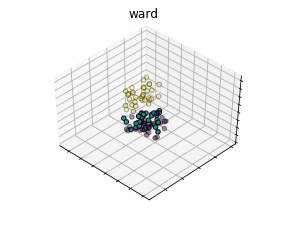

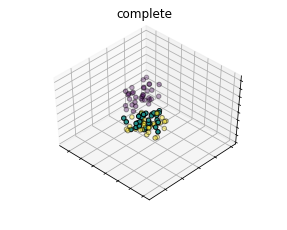

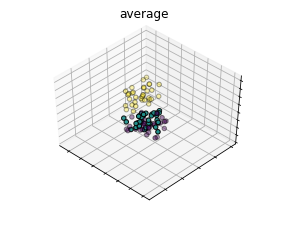

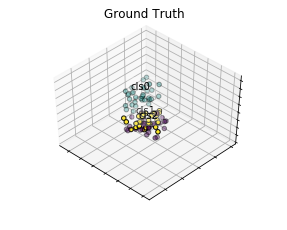

In [14]:
fignum = 1
titles = ['ward', 'complete', 'average']
for name, est in estimators:
    
    fig = plt.figure(fignum, figsize = (4,3))
    ax = Axes3D(fig, rect = [0,0,0.95,1] , elev = 48, azim = 134)
    
    est.fit(x)
    
    labels = est.labels_
    ax.scatter(x[:,3], x[:,0], x[:,2], c = labels.astype(np.float), edgecolor = 'k')
    
    #No ticks
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum += 1

#Plot the ground truth
fig = plt.figure(fignum, figsize = (4,3))
ax = Axes3D(fig, rect = [0,0,0.95,1], elev = 48, azim = 134)

for name, label in [('cls0', 0), ('cls1', 1), ('cls2', 2)]:
    ax.text3D(x[y==label, 3].mean() ,
                  x[y==label, 0].mean() ,
                  x[y==label, 2].mean()+2, name, horizontalalignment = 'center',
                  bbox = dict(alpha = 0.2, edgecolor ='w', facecolor = 'w'))

y = np.choose(y, [1,2,0]).astype(np.float)
ax.scatter(x[:,3], x[:,0], x[:,2], c = y, edgecolor = 'k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('Ground Truth')
ax.dist = 12

# 作業
作業目標 : 用 iris (dataset.load_iris()) 資料嘗試跑 hierarchical clustering

In [22]:
iris = datasets.load_iris()
x = iris.data[:,[0,1,2]]
y = iris.target

In [24]:
features = iris.feature_names[0:3]
targets = iris.target_names


print(f' dataset feature names : {features}' )
print(f' dataset target names : {targets}')

 dataset feature names : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']
 dataset target names : ['setosa' 'versicolor' 'virginica']


In [25]:
estimators = [ ('hc_ward' , AgglomerativeClustering(n_clusters = 3, linkage = 'ward')), 
                     ('hc_complete', AgglomerativeClustering(n_clusters = 3, linkage = 'complete')),
                     ('hc_average', AgglomerativeClustering(n_clusters = 3, linkage = 'average'))]

titles = ['ward', 'complete', 'average']

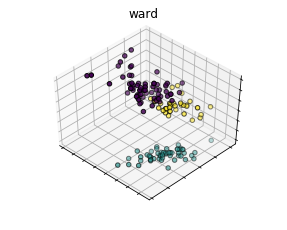

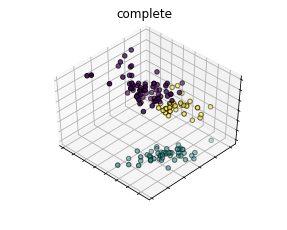

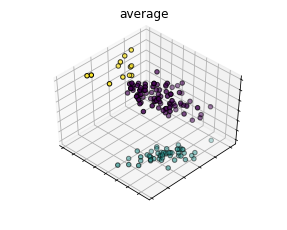

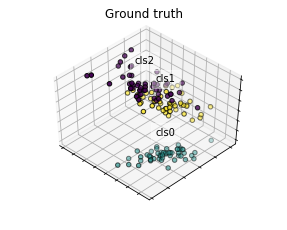

In [27]:
fignum = 1
for name, est in estimators:
    fig = plt.figure(fignum, figsize = (4,3))
    ax = Axes3D(fig, rect = [0, 0, 0.95, 1], elev = 48, azim = 134)
    
    est.fit(x)
    labels = est.labels_
    
    ax.scatter(x[:,0], x[:,1], x[:,2], c = labels.astype(np.float), edgecolor = 'k')
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_title(titles[fignum-1])
    ax.dist = 12
    fignum += 1

#plot the ground truth
fig = plt.figure(fignum, figsize = (4,3))
ax = Axes3D(fig, rect = [0,0,0.95,1], elev = 48, azim = 134)

for name, label in [ ('cls0', 0), ('cls1', 1), ('cls2', 2)]:
    ax.text3D(x[y==label, 0].mean(),
                  x[y==label, 1].mean(),
                  x[y==label, 2].mean()+2 , name, horizontalalignment = 'center',
                  bbox = dict(alpha = 0.4, edgecolor = 'w', facecolor = 'w'))

y = np.choose(y, [1,2,0]).astype(float)
ax.scatter(x[:,0], x[:,1], x[:,2], c = y, edgecolor ='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('Ground truth')
ax.dist = 12
